# Spatial Autocorrelation

This notebook will demostrate a popular spatial analysis task which is to examine the spatial autocorrelation pattern. I will demostrate using data from US census bureau obtained through API and `census` package.

## Part 1 Census API

- [Importing and Interpreting Census Data](#importing-and-interpreting-census-data)
- [FIPS Code](#fips-code)
- [Obtain a Boundary File from Tiger](#obtain-a-boundary-file-from-tiger)

Install `census` and `us` package. The `us` package provides some convenient lookup to the FIPS code and boundary files.

In [1]:
pip install -q census

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q us

Note: you may need to restart the kernel to use updated packages.


Import the packages

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from census import Census
import us

First, get yourself a Census API key from [here](https://api.census.gov/data/key_signup.html). This will require you to put your affliation and your email. Then you need to activate your API key through email. You will then get a long key string to replace what I have here:

In [3]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [8]:
# first attempt at setting up an .env file
# there has to have been a more efficient way to do this

import os
from dotenv import set_key
from dotenv import dotenv_values
from dotenv import load_dotenv
from pathlib import Path

env_file_path = Path('c:/users/' + os.getlogin() + 'Documents/GIS5103/GIS5103/.env')

load_dotenv()

get_census_api = os.getenv('census_api_key')
#print(get_census_api)

### Importing and Interpreting Census Data

In [9]:
census_api_key = (get_census_api)

c = Census(census_api_key)

Then we can use a function to automatically download census data and make it into a nicely formatted Dataframe.

Below is an example to fetch the county level data for variables:

*   Total population (**B01003_001E**)
*   Median monthly housing costs (**B25105_001E**)
*   Numbers of people who drive (van, truck, car) to work (**B08134_011E**)


This data is from the American Community Survey (ACS) which is an annual effort to sample a small portion of US addresses through questionaries and aggregate data into census products over multiple years. Most often, the 5-year estimate ACS has good coverage, more details can be seen here: https://www.census.gov/data/developers/data-sets/acs-5year.html

Lookup table for variables: https://api.census.gov/data/2019/acs/acs5/variables.html

In [11]:
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html

fl_census = c.acs5.state_county(fields = ('NAME', 'B01003_001E', 'B25105_001E', 'B08134_001E'), #variable names
                                      state_fips = '12', #state FIPS code for FL
                                      county_fips = "*", #"*" means all counties in the state
                                      year = 2019) # 2019 data


#Get tract level data

fl_census_tract = c.acs5.state_county_tract(fields = ('NAME', 'B01003_001E', 'B25105_001E', 'B08134_001E'), #variable names
                                      state_fips = '12', #state FIPS code for FL
                                      county_fips = "*", #"*" means all counties in the state
                                      tract = "*", #"*" means all tracts in the counties/state
                                      year = 2019) # 2019 data

Make the results a data frame.

In [15]:
fl_df = pd.DataFrame(fl_census)
fl_tract_df = pd.DataFrame(fl_census_tract)

In [17]:
fl_df

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county
0,"Washington County, Florida",24764.0,581.0,8147.0,12,133
1,"Duval County, Florida",936186.0,1084.0,435422.0,12,031
2,"Bradford County, Florida",27317.0,656.0,9045.0,12,007
3,"Brevard County, Florida",585507.0,971.0,233536.0,12,009
4,"Clay County, Florida",211405.0,1091.0,91147.0,12,019
...,...,...,...,...,...,...
62,"Levy County, Florida",40403.0,570.0,14105.0,12,075
63,"Volusia County, Florida",536487.0,939.0,208321.0,12,127
64,"Madison County, Florida",18460.0,526.0,6010.0,12,079
65,"Escambia County, Florida",313491.0,930.0,131031.0,12,033


In [18]:
fl_tract_df

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128
...,...,...,...,...,...,...,...
4240,"Census Tract 312, Clay County, Florida",15742.0,1207.0,6301.0,12,019,031200
4241,"Census Tract 308.01, Clay County, Florida",5723.0,1212.0,2402.0,12,019,030801
4242,"Census Tract 309.02, Clay County, Florida",10342.0,1022.0,4798.0,12,019,030902
4243,"Census Tract 303.01, Clay County, Florida",8960.0,969.0,4013.0,12,019,030301


In [19]:
fl_df.head()

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county
0,"Washington County, Florida",24764.0,581.0,8147.0,12,133
1,"Duval County, Florida",936186.0,1084.0,435422.0,12,031
2,"Bradford County, Florida",27317.0,656.0,9045.0,12,007
3,"Brevard County, Florida",585507.0,971.0,233536.0,12,009
4,"Clay County, Florida",211405.0,1091.0,91147.0,12,019


In [20]:
fl_tract_df.head()

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128


Make column names more intuitive.

In [25]:
fl_df = fl_df.rename(columns={
    "B01003_001E": "total_population",
    "B25105_001E": "monthly_housing_costs",
    "B08134_001E": "population_drive_to_work"
    })

In [21]:
fl_tract_df = fl_tract_df.rename(columns={
    "B01003_001E": "total_population",
    "B25105_001E": "monthly_housing_costs",
    "B08134_001E": "population_drive_to_work"
})

In [26]:
fl_df.head()

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county
0,"Washington County, Florida",24764.0,581.0,8147.0,12,133
1,"Duval County, Florida",936186.0,1084.0,435422.0,12,031
2,"Bradford County, Florida",27317.0,656.0,9045.0,12,007
3,"Brevard County, Florida",585507.0,971.0,233536.0,12,009
4,"Clay County, Florida",211405.0,1091.0,91147.0,12,019


In [38]:
fl_tract_df.head()

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128


In [35]:
fl_leon_tract_df = fl_tract_df.loc[fl_tract_df["NAME"].str.contains('Leon County, Florida', case=False, na=False)]
fl_leon_tract_df

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county,tract
92,"Census Tract 25.10, Leon County, Florida",6835.0,1127.0,3905.0,12,073,002510
93,"Census Tract 25.11, Leon County, Florida",1502.0,1004.0,558.0,12,073,002511
94,"Census Tract 25.12, Leon County, Florida",3718.0,1444.0,1653.0,12,073,002512
95,"Census Tract 25.13, Leon County, Florida",4664.0,1463.0,2265.0,12,073,002513
96,"Census Tract 26.03, Leon County, Florida",4622.0,803.0,1888.0,12,073,002603
...,...,...,...,...,...,...,...
4013,"Census Tract 24.15, Leon County, Florida",4170.0,1314.0,1700.0,12,073,002415
4014,"Census Tract 24.16, Leon County, Florida",2816.0,1587.0,1159.0,12,073,002416
4015,"Census Tract 24.17, Leon County, Florida",7784.0,1910.0,3713.0,12,073,002417
4016,"Census Tract 25.07, Leon County, Florida",2279.0,1034.0,993.0,12,073,002507


### FIPS Code

Each census unit is identified by the FIPS (Federal Information Processing Standard) code

<img src="https://blog.cdxtech.com/Blog/image.axd?picture=2012%2F8%2FFIPS+CODE.png">

And most of the administrative data from varisous agencies should have this code.

### Obtain a boundary file from TIGER

A quick and easy way to directly fetch boundary from TIGER.

First we need to know the URL of the unit we want.

In [39]:
urls = us.states.FL.shapefile_urls()

urls.keys()

dict_keys(['tract', 'cd', 'county', 'state', 'zcta', 'block', 'blockgroup'])

This will return you with an URL, that you can pass into geopandas's `read_file`.

In [40]:
urls['county']

'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_12_county10.zip'

Here, we are interested in the county level for Florida. *You are only  able to get the 2010 TIGER method using this method.

In [41]:
url = urls['county']

In [42]:
fl_county = gpd.read_file(url)

<Axes: >

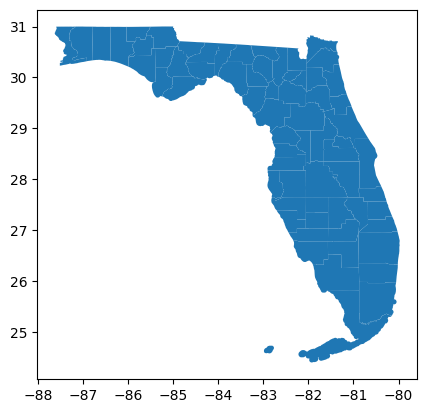

In [43]:
fl_county.plot()

In [44]:
fl_county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [45]:
fl_county.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,12,017,00295752,12017,Citrus,Citrus County,06,H1,G4020,None,26140,None,A,1506586255,496236304,+28.8436275,-082.5247964,"POLYGON ((-82.45142 28.69481, -82.45247 28.694..."
1,12,009,00295749,12009,Brevard,Brevard County,06,H1,G4020,None,37340,None,A,2630557912,1402040884,+28.2982755,-080.7003842,"POLYGON ((-80.49977 28.40954, -80.49989 28.409..."
2,12,037,00306911,12037,Franklin,Franklin County,06,H1,G4020,None,None,None,A,1384930964,1273675839,+29.8101756,-084.7991735,"POLYGON ((-85.0219 29.82354, -85.02224 29.8237..."
3,12,011,00295753,12011,Broward,Broward County,06,H1,G4020,None,33100,22744,A,3133329108,292869341,+26.1935200,-080.4766578,"POLYGON ((-80.29693 26.33436, -80.29691 26.335..."
4,12,047,00295736,12047,Hamilton,Hamilton County,06,H1,G4020,None,None,None,A,1330711074,13638327,+30.4911024,-082.9510488,"POLYGON ((-83.0557 30.61947, -83.051 30.61919,..."


The GeoDataFrame has FIPS code that we can use to join with the census data. Note that the `GEOID10` concatenates state and county (and tract/block if any) code together into a long code.

To make a consistent key, we need to create a new column in the census dataframe `fl_df` exactly the same as the `GEOID10` in `fl_county`.

In [46]:
fl_df.head()

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county
0,"Washington County, Florida",24764.0,581.0,8147.0,12,133
1,"Duval County, Florida",936186.0,1084.0,435422.0,12,031
2,"Bradford County, Florida",27317.0,656.0,9045.0,12,007
3,"Brevard County, Florida",585507.0,971.0,233536.0,12,009
4,"Clay County, Florida",211405.0,1091.0,91147.0,12,019


In [47]:
fl_df["GEOID10"] = fl_df["state"] + fl_df["county"]

In [48]:
fl_df["GEOID10"]

0     12133
1     12031
2     12007
3     12009
4     12019
      ...  
62    12075
63    12127
64    12079
65    12033
66    12091
Name: GEOID10, Length: 67, dtype: object

Merge two dataframes based on the same key `GEOID10`.

In [49]:
fl_county_df = pd.merge(fl_county, fl_df,on="GEOID10")

In [50]:
fl_county_df.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,AWATER10,INTPTLAT10,INTPTLON10,geometry,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county
0,12,017,00295752,12017,Citrus,Citrus County,06,H1,G4020,None,...,496236304,+28.8436275,-082.5247964,"POLYGON ((-82.45142 28.69481, -82.45247 28.694...","Citrus County, Florida",145169.0,639.0,42604.0,12,017
1,12,009,00295749,12009,Brevard,Brevard County,06,H1,G4020,None,...,1402040884,+28.2982755,-080.7003842,"POLYGON ((-80.49977 28.40954, -80.49989 28.409...","Brevard County, Florida",585507.0,971.0,233536.0,12,009
2,12,037,00306911,12037,Franklin,Franklin County,06,H1,G4020,None,...,1273675839,+29.8101756,-084.7991735,"POLYGON ((-85.0219 29.82354, -85.02224 29.8237...","Franklin County, Florida",11811.0,644.0,4069.0,12,037
3,12,011,00295753,12011,Broward,Broward County,06,H1,G4020,None,...,292869341,+26.1935200,-080.4766578,"POLYGON ((-80.29693 26.33436, -80.29691 26.335...","Broward County, Florida",1926205.0,1356.0,898752.0,12,011
4,12,047,00295736,12047,Hamilton,Hamilton County,06,H1,G4020,None,...,13638327,+30.4911024,-082.9510488,"POLYGON ((-83.0557 30.61947, -83.051 30.61919,...","Hamilton County, Florida",14326.0,490.0,3591.0,12,047


<Axes: >

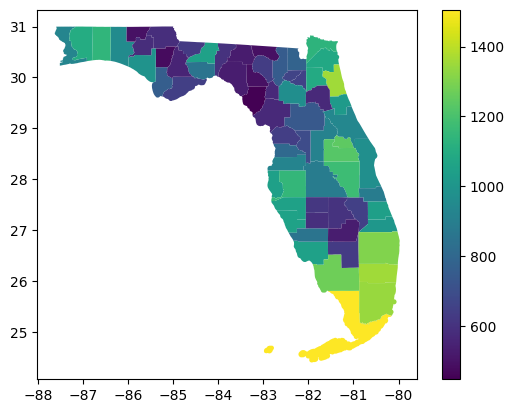

In [51]:
fl_county_df.plot(column="monthly_housing_costs",legend=True)

<Axes: >

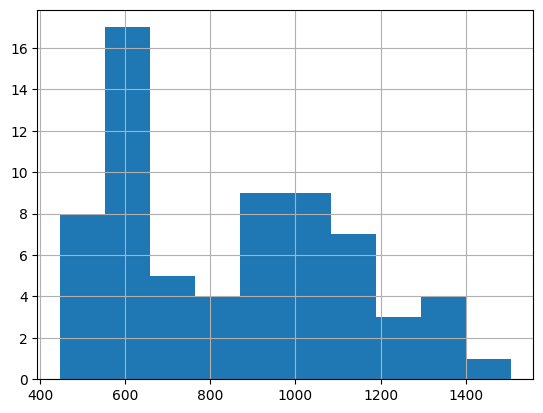

In [52]:
fl_county_df.monthly_housing_costs.hist()

Now let's look at the other variable, population drive to work. Here we can calculate the % of people drive to work and make a new column in the dataframe.

In [53]:
fl_county_df["pct_drive"] = fl_county_df["population_drive_to_work"]/fl_county_df["total_population"]*100

to improve this, you could use "working age population" instead of "total population"

<Axes: >

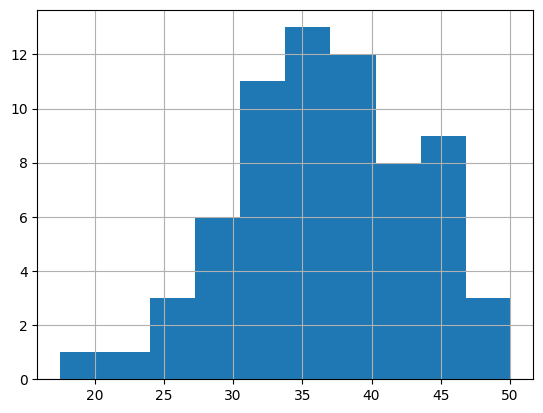

In [54]:
fl_county_df["pct_drive"].hist()

Text(0.5, 1.0, '% of People drive to work')

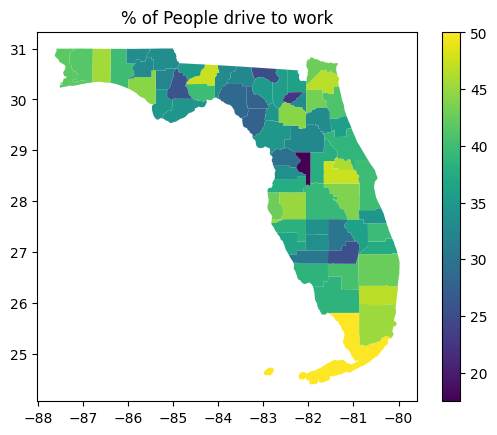

In [55]:
fl_county_df.plot(column="pct_drive",legend=True)

plt.title("% of People drive to work")

A simple scatterplot showing a positive correlation between the two variables.

Text(0, 0.5, 'Monthly Housing Costs')

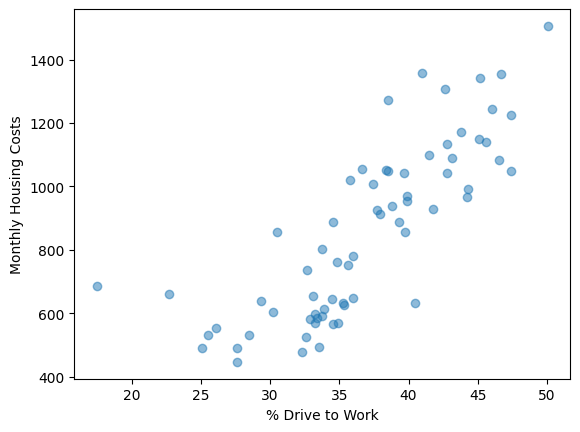

In [56]:
plt.scatter(fl_county_df["pct_drive"], fl_county_df["monthly_housing_costs"],alpha=0.5)

plt.xlabel("% Drive to Work")
plt.ylabel("Monthly Housing Costs")

## Part 2 Autocorrelation Analysis

- [Global Moran's I](#global-morans-i-and-p-value)
- [Moran Scatterplot](#moran-scatterplot)
- [Local Moran's I (LISA)](#local-morans-i-lisa)
- [Bivariate LISA](#bivariate-lisa)


If you have `pysal` installed, you may not need to install these

In [57]:
#pip install -q splot

In [58]:
#pip install -q libpysal

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


from libpysal.weights.contiguity import Queen

from splot.esda import moran_scatterplot,plot_moran,lisa_cluster
from esda.moran import Moran, Moran_Local

import splot

### Global Moran's I and p-value

Specify a weight matrix

In [60]:
w = Queen.from_dataframe(fl_county_df) #Generate W matrix using Queen contiguity


#w = Rook.from_dataframe(fl_county_df) #Generate W matrix using Rook contiguity


w.transform = 'r' #Row-standardization of the weight matrix

C:\Users\alexb\AppData\Local\Temp\ipykernel_11072\2304272244.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(fl_county_df) #Generate W matrix using Queen contiguity


Calculate Moran's I

In [61]:
from esda.moran import Moran

housing_costs = fl_county_df['monthly_housing_costs'].values #Get the data we are interested.


global_moran = Moran(housing_costs, w)

global_moran.I

np.float64(0.4771382216983452)

p-value

In [62]:
global_moran.p_sim # P value based on permutation tests

np.float64(0.001)

This is indicating that the observed positive spatial autocorrelation of the median housing costs map is statistically significant (p<0.05).

In other words, if we assume the pattern to be random, there is around ~0.5% probability that we will observe a pattern like our real data. so the spatial pattern is very unlikely to be random.  

### Moran Scatterplot

(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.48', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.48)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

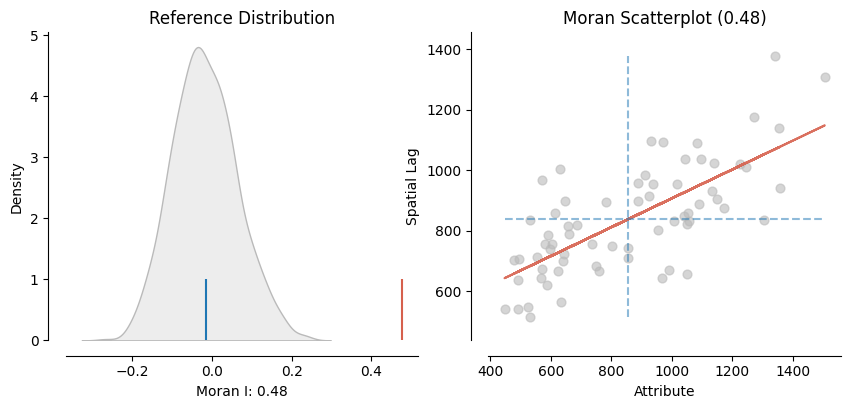

In [63]:
from splot.esda import plot_moran

plot_moran(global_moran, 
           zstandard=False, #True the data will be normalized (mean removed and divided by std)
           figsize=(10,4)
          )

The left is the null sampling distribution of Moran's I under assumption of spatial randomness. The blue bar is the position of expected Moran's I value (-1/(n-1)), and the red bar marks the observed Moran's I value (0.48).

The right is a Moran Scatterplot.

### Local Moran's I (LISA)

Generate a better Moran Scatterplot with significance of the local moran's Is.

Color code each county with the quadrant it falls into.
- Red: HH (High values near high values)
- Light Blue: LH
- Yellow: HL
- Blue: LL

Text(0, 0.5, 'Averaged Housing Costs in the Close Neighborhoods')

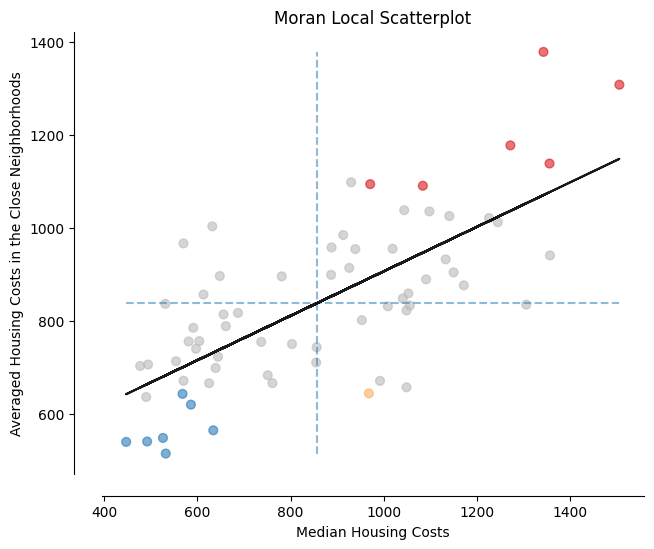

In [64]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_local = Moran_Local(housing_costs, w)

fig, ax = moran_scatterplot(moran_local, zstandard=False, p=0.05)

#Labelling
ax.set_xlabel('Median Housing Costs')
ax.set_ylabel('Averaged Housing Costs in the Close Neighborhoods')


Create a hot-spot and cold-spot map.
- HH: High % Bach county surrounded by High % Bach county
- LL: Low-Low
- LH: Low-High
- HL: High-Low
- NS: Non-significant (p>0.05)

(<Figure size 600x600 with 1 Axes>, <Axes: >)

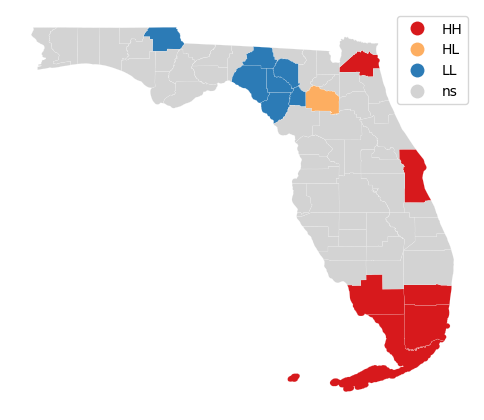

In [65]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc=moran_local, 
             gdf=fl_county_df, 
             p = 0.05, # the level of p-value threshold to mask for non-significance
             figsize = (6,6))

### Bivariate LISA

looking at pair-wise relationship between a variable and another variable (neighborhood-averaged)

In [66]:
from esda.moran import Moran_Local_BV

Text(0, 0.5, 'Averaged Housing Costs in the Close Neighborhood')

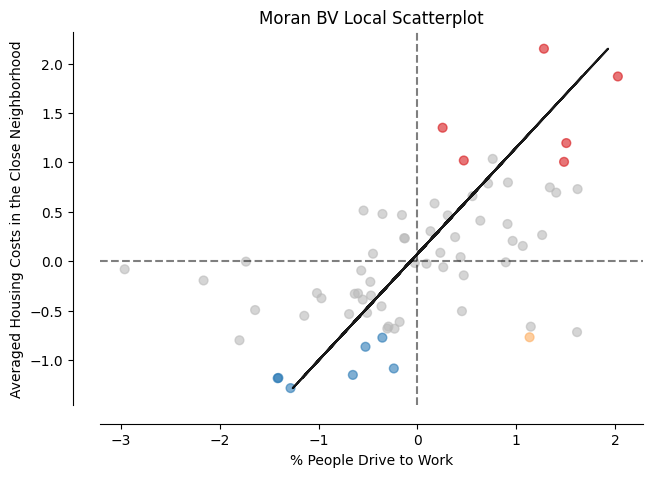

In [67]:
x = fl_county_df['pct_drive'].values
y = fl_county_df['monthly_housing_costs'].values

moran_loc_bv = Moran_Local_BV(x, y, w)

fig, ax = moran_scatterplot(moran_loc_bv, p=0.05,zstandard=False) #It seems the z-standard parameter is not working.


ax.set_xlabel('% People Drive to Work')
ax.set_ylabel('Averaged Housing Costs in the Close Neighborhood')

(<Figure size 600x600 with 1 Axes>, <Axes: >)

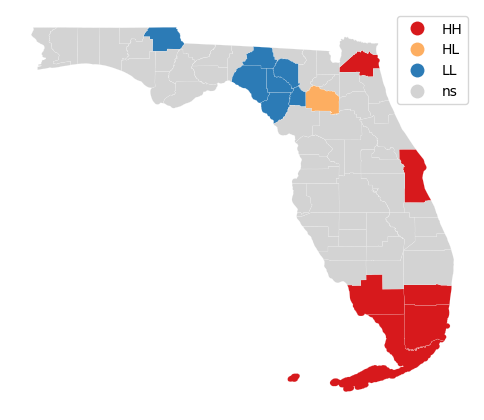

In [68]:
from splot.esda import plot_local_autocorrelation

lisa_cluster(moran_loc=moran_loc_bv, 
             gdf=fl_county_df, 
             p = 0.05, # the level of p-value threshold to mask for non-significance
             figsize = (6,6))

Bi-variate hot-spot interpretations

- HH: More people drive to work and high averaged housing costs.
- LL: Fewer people drive to work and low housing costs.
- LH: Fewer people drive to work and high housing costs.
- HL: More people drive to work and low housing costs.